In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

procon= "pro"
proFilePath = f"~/Desktop/R_js/data/{procon}_doc_sampled.csv"
df = pd.read_csv(proFilePath)
display(df.head(6))
print(df.shape)

,Unnamed: 0,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name
0,0,2.0,1,2017,"hour lunch, friendly co-workers.",cowork friendli hour lunch friendli_cowork hou...,"['cowork', 'friendli', 'hour', 'lunch', 'frien...",9,3.0,2.0,2.0,1.0,3.0,1,Walmart
1,1,3.0,1,2015,"benefits, Medical, dental, myshare, 401k, stocks",benefit dental medic myshar stock,"['benefit', 'dental', 'medic', 'myshar', 'stock']",5,3.0,4.0,4.0,3.0,3.0,1,Walmart
2,2,2.0,0,2012,discount card . schedule 3 on 3 off,card discount schedul discount_card,"['card', 'discount', 'schedul', 'discount_card']",4,1.0,4.0,3.0,1.0,3.0,1,Walmart
3,3,4.0,0,2017,good break lengths and plenty of hours,break hour length plenti plenti_hour,"['break', 'hour', 'length', 'plenti', 'plenti_...",5,4.0,3.0,3.0,4.0,4.0,1,Walmart
4,4,1.0,1,2016,My pay was good and my schedule allowed me to ...,allow job pay schedul pay_schedul,"['allow', 'job', 'pay', 'schedul', 'pay_schedul']",5,3.0,3.0,1.0,1.0,1.0,1,Walmart
5,5,5.0,0,2015,"Meeting new people, making new friends",friend meet peopl meet_peopl,"['friend', 'meet', 'peopl', 'meet_peopl']",4,5.0,2.0,5.0,3.0,5.0,1,Walmart


(33624, 15)


In [47]:
# Form Corpus
corpus = df.Px_Texts.tolist()

# Checking total number of unique words in the corpus
a = ' '.join(sent for sent in corpus)
a = a.split(" ")
print(len(a))
a = list(set(a))
print(len(a))

246608
14894


## Tf-idf Vectorizer

In [48]:
# Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
print(tfidf.shape)

(33624, 14889)


# Optimal Number of Clusters

In [5]:
ssd = [] # Sum of Squared distances

K = [8, 12, 16, 20]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tfidf)
    ssd.append(km.inertia_)

KeyboardInterrupt: 

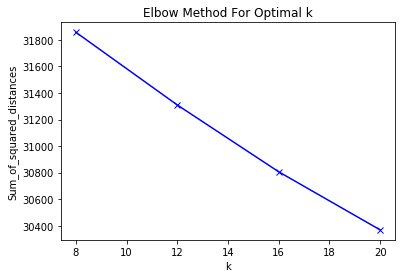

In [9]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



# Train Model

In [58]:
from sklearn.cluster import KMeans

num_cluster = 20
kmeans = KMeans(n_clusters=num_cluster).fit(tfidf)

## Load K-means cluster from here

In [60]:
from sklearn.externals import joblib
import os

# root = os.path.expanduser("~")
# model_path = root + "/Desktop/workspace/indeed/Job-Satisfaction/data/models/cluster/"
# joblib.dump(kmeans, model_path + "kmeans.pkl")

# kmeans = joblib.load(model_path + "kmeans.pkl")
clusters = [i+1 for i in kmeans.labels_.tolist()]
# display(clusters)

In [61]:
df["Cluster"] = clusters
df.head()

,Unnamed: 0,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name,Cluster
0,0,2.0,1,2017,"hour lunch, friendly co-workers.",cowork friendli hour lunch friendli_cowork hou...,"['cowork', 'friendli', 'hour', 'lunch', 'frien...",9,3.0,2.0,2.0,1.0,3.0,1,Walmart,13
1,1,3.0,1,2015,"benefits, Medical, dental, myshare, 401k, stocks",benefit dental medic myshar stock,"['benefit', 'dental', 'medic', 'myshar', 'stock']",5,3.0,4.0,4.0,3.0,3.0,1,Walmart,1
2,2,2.0,0,2012,discount card . schedule 3 on 3 off,card discount schedul discount_card,"['card', 'discount', 'schedul', 'discount_card']",4,1.0,4.0,3.0,1.0,3.0,1,Walmart,1
3,3,4.0,0,2017,good break lengths and plenty of hours,break hour length plenti plenti_hour,"['break', 'hour', 'length', 'plenti', 'plenti_...",5,4.0,3.0,3.0,4.0,4.0,1,Walmart,1
4,4,1.0,1,2016,My pay was good and my schedule allowed me to ...,allow job pay schedul pay_schedul,"['allow', 'job', 'pay', 'schedul', 'pay_schedul']",5,3.0,3.0,1.0,1.0,1.0,1,Walmart,3


In [62]:
print("K-Means Clustering")
print(f"Topic Proportion ({procon}/{num_cluster} topics): ")
df.Cluster.value_counts() * 100 / df.shape[0]

K-Means Clustering
Topic Proportion (pro/20 topics): 


1     40.726862
3      6.873067
19     5.513919
6      4.722817
13     4.238044
15     4.202355
9      3.759220
8      3.690816
11     3.378539
12     3.015703
2      2.914585
17     2.905663
16     2.560671
20     2.417916
10     1.873662
5      1.778492
14     1.662503
7      1.311563
18     1.299667
4      1.153938
Name: Cluster, dtype: float64

In [63]:
# vocab = vectorizer.vocabulary_
# inv_vocab = {v: k for k, v in vocab.items()}
# print(inv_vocab)

In [64]:
# print(inv_vocab[0])

In [65]:
feat_name = vectorizer.get_feature_names()
print(vectorizer.get_feature_names()[0])

050_cent_hour


In [66]:
print("K-Means Clustering")
print(f"Top terms per cluster ({procon}/{num_cluster} topics): ")
print()


order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# print(len(order_centroids))
# print((order_centroids))

topics = {}
for i in range(num_cluster): 
    print(f"Cluster {i+1}: ")
    words = [] 
    for ind in order_centroids[i, :10] :
        words.append(feat_name[ind])
    
    topics[i] = " ".join(words)
    print(", ".join(words))
    print()
    
# print(topics)

K-Means Clustering
Top terms per cluster (pro/20 topics): 

Cluster 1: 
benefit, free, peopl, environ, manag, discount, food, team, custom, train

Cluster 2: 
balanc, worklif_balanc, worklif, life_balanc, life, benefit, benefit_life_balanc, benefit_life, balanc_benefit, benefit_worklif_balanc

Cluster 3: 
pay, benefit_pay, benefit, hour, peopl, competit, manag, time, rate, competit_pay

Cluster 4: 
co_worker, co, worker, friendli, friendli_co_worker, nice, friendli_co, benefit, benefit_co_worker, pay

Cluster 5: 
decent, decent_pay, pay, benefit, decent_pay_benefit, benefit_decent, decent_benefit, pay_decent, pay_benefit, benefit_decent_pay

Cluster 6: 
free_lunch, lunch, free, sometim, free_lunch_sometim, lunch_sometim, occasion, time, occasion_free_lunch, holiday

Cluster 7: 
atmospher, friendli_atmospher, friendli, fun_atmospher, fun, relax, team, famili, benefit, relax_atmospher

Cluster 8: 
opportun, advanc, opportun_advanc, advanc_opportun, growth, career, benefit, career_advanc,

In [16]:
for i in range(num_cluster): 
    df.loc[df.Cluster == i, "Topic_Words"] = topics[i]

display(df.head())
print(df.Topic_Words.isna().sum())

,Unnamed: 0,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name,Cluster,Topic_Words
0,0,1.0,0,2019,"Management, communication, workforce, and clea...",clean commun manag manag_commun,"['clean', 'commun', 'manag', 'manag_commun']",4,1.0,1.0,1.0,1.0,1.0,1,Walmart,9,manag upper upper_manag lack commun employe mi...
1,1,1.0,1,2014,ovebearing managers lack of staffing poor wages,lack manag poor staf wage manag_lack,"['lack', 'manag', 'poor', 'staf', 'wage', 'man...",6,3.0,1.0,1.0,1.0,3.0,1,Walmart,10,poor_manag poor manag manag_poor poor_manag_po...
2,2,5.0,0,2015,"Benefits, associate pay, and lack of help duri...",associ benefit help holiday lack pay lack_help...,"['associ', 'benefit', 'help', 'holiday', 'lack...",8,5.0,5.0,5.0,5.0,5.0,1,Walmart,13,benefit chang constant health constant_chang m...
3,3,5.0,0,2018,had to waste our breaks waiting in line to pur...,break food item line wait wast,"['break', 'food', 'item', 'line', 'wait', 'wast']",6,5.0,5.0,5.0,5.0,5.0,1,Walmart,5,employe pay custom lack peopl lot care health ...
4,4,5.0,0,2019,"Short breaks, and get stationed in different d...",break depart differ short store time differ_de...,"['break', 'depart', 'differ', 'short', 'store'...",8,5.0,5.0,5.0,3.0,4.0,1,Walmart,19,short_break short break short_break_hour hour ...


0


## Dissimilarity Measure between Documents

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)

print(dist)

[[ 0.00000000e+00  9.54975604e-01  1.00000000e+00 ...  9.57173627e-01
   1.00000000e+00  1.00000000e+00]
 [ 9.54975604e-01 -2.22044605e-16  9.26377332e-01 ...  9.56928893e-01
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  9.26377332e-01  0.00000000e+00 ...  9.48041837e-01
   1.00000000e+00  1.00000000e+00]
 ...
 [ 9.57173627e-01  9.56928893e-01  9.48041837e-01 ... -2.22044605e-16
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
  -2.22044605e-16  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00 -2.22044605e-16]]


In [18]:
print(len(dist[0]))
print(len(dist))

32988
32988


In [19]:
top_dist = kmeans.cluster_centers_
print(top_dist)

print(kmeans.score)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.00717054 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>


## Dimensionality Reduction

In [ ]:
# Clustering
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
X_tsne = tsne.fit_transform(tfidf.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 32988 samples in 74.551s...


In [ ]:
# Generate random colors

import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colormap = np.asarray(get_colors(num_topics)) 
print(colormap)

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['X_tsne'] = X_tsne[:, 0]
df_cluster['Y_tsne'] = X_tsne[:, 1]
df_cluster['Topic_Num'] = df.Cluster.tolist()
df_cluster['Topic_Label'] = df.Topic_Words.tolist()
df_cluster['Document'] = df.Review_Text.tolist()

cluster_colors = dict()
for c in range(num_topics): 
    cluster_colors[c] = colormap[c]
    
df_cluster['Colors'] = df_cluster['Topic_Num'].apply(lambda l: cluster_colors[l])
df_cluster.sort_values(by=['Topic_Num'], inplace=True)

display(df_cluster.head())